# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [84]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [85]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [86]:
# Show keys
print(diabetes.keys())
print(len(diabetes))

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
8


In [87]:
# Show feature names
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [88]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

* Hay 10 variables, que son las Attribute Information
* diabetes['data'] son las features de nuestros pacientes, mientras que diabetes['target'] tenemos la variable cuantitativa de diabetes
* Hay 442 registros

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [89]:
data = diabetes['data']
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [90]:
target = diabetes['target']
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [91]:
# Show shape, size and ndim of 'data'
print(data.shape)
print(data.size)
print(data.ndim)

(442, 10)
4420
2


In [92]:
# Show shape, size and ndim of 'target'
print(target.shape)
print(target.size)
print(target.ndim)

(442,)
442
1


## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [93]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [94]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [95]:
# Forma 1 a mano
x_train = data[:-20, :]
x_test = data[-20:, :]
y_train = target[:-20]
y_test = target[-20:]

In [96]:
[cosa.shape for cosa in [x_train, x_test, y_train, y_test]]

[(422, 10), (20, 10), (422,), (20,)]

In [97]:
# Forma 2 con train_test_split
# test_size = 422
# shuffle=False

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, train_size = 422, shuffle=False)

In [98]:
# Muestra el tamaño de data_train, data_test, target_train y target_test

In [99]:
[cosa.shape for cosa in [x_train, x_test, y_train, y_test]]

[(422, 10), (20, 10), (422,), (20,)]

In [100]:
# Pasar array a dataframe
df = pd.DataFrame(data, columns=diabetes['feature_names'])
df['target'] = diabetes['target']

In [101]:
# Muestra los estadísticos
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [102]:
!pip install scipy

In [103]:
from scipy import stats

In [104]:
# Muestra skew y kurtosis con stats de scipy
print(stats.skew(df.target))            ############## VER
print(stats.kurtosis(df.target))

0.43906639932477265
-0.8866436055681386


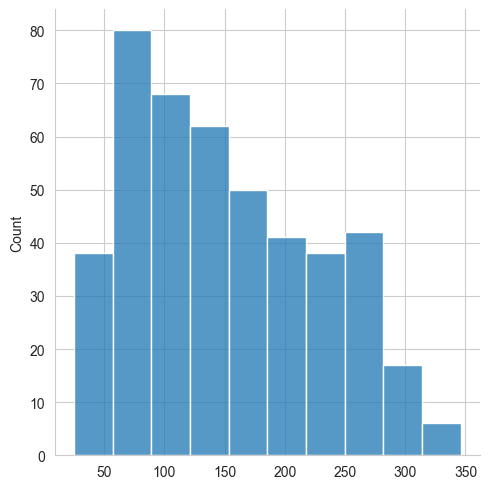

In [105]:
# Genera un distplot de target
import seaborn as sns
sns.displot(target)

<Axes: >

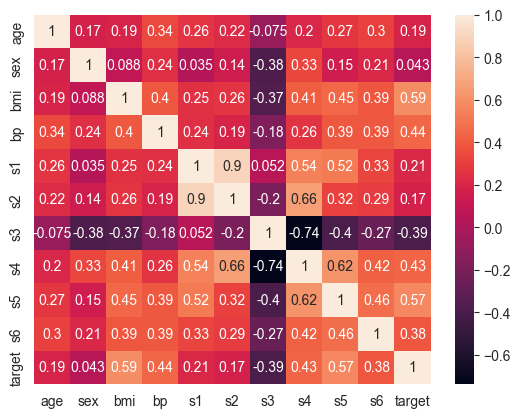

In [106]:
# Genera un heatmap
sns.heatmap(df.corr(), annot=True)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [107]:
diabetes_model.fit(x_train, y_train)

LinearRegression()

In [108]:
diabetes_model.score(x_test, y_test)

0.585085427447195

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + bx1 + cx2...
7.43e+02 = 7.43*^10^2 = 743

In [109]:
# coefficient array (m)
diabetes_model.coef_

array([ 3.06094248e-01, -2.37635570e+02,  5.10538048e+02,  3.27729878e+02,
       -8.14111926e+02,  4.92799595e+02,  1.02841240e+02,  1.84603496e+02,
        7.43509388e+02,  7.60966464e+01])

In [110]:
# Crea un df con el coeficiente de cada feature
array = diabetes_model.coef_
array

array([ 3.06094248e-01, -2.37635570e+02,  5.10538048e+02,  3.27729878e+02,
       -8.14111926e+02,  4.92799595e+02,  1.02841240e+02,  1.84603496e+02,
        7.43509388e+02,  7.60966464e+01])

In [111]:
pd.DataFrame(array, columns=['Coefficient'], index=diabetes['feature_names']).sort_values('Coefficient', ascending=False, key=abs)

,Coefficient
s1,-814.111926
s5,743.509388
bmi,510.538048
s2,492.799595
bp,327.729878
sex,-237.635570
s4,184.603496
s3,102.841240
s6,76.096646
age,0.306094


In [112]:
# intercepto (c)
diabetes_model.intercept_

np.float64(152.76429169049118)

In [113]:
# Crea una predicción con los datos de test y grábalos en la variable predictions
predictions = diabetes_model.predict(x_test)
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [114]:
y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [116]:
# Muestra el Mean Absolute Error, el Mean Squared Error y el Root Mean Squared Error
# print('R2:', r2_score(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions)) # cuanto mas distinto sea del RMSE, mas errores groseros tengo, mas desviacion estandar.
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))

MAE: 36.60961865545879
MSE: 2004.5186863342092
RMSE: 44.77185149548999
MAPE: 0.3930876102873051


#### Is `diabetes_target_test` exactly the same as the model prediction?

In [117]:
error = pd.DataFrame(predictions, columns=['prediction'])

In [118]:
error['y_test'] = y_test
error['error'] = abs(predictions-y_test)

In [119]:
error

,prediction,y_test,error
0,197.618985,233.0,35.381015
1,155.440320,91.0,64.440320
2,172.888751,111.0,61.888751
3,111.532706,152.0,40.467294
4,164.793973,120.0,44.793973
5,131.067659,67.0,64.067659
6,259.124412,310.0,50.875588
7,100.478737,94.0,6.478737
8,117.060054,183.0,65.939946
9,124.302616,66.0,58.302616


#### Which are the most important features?

In [120]:
from sklearn.preprocessing import StandardScaler

# Repetimos el entrenamiento, esta vez estandarizando los datos
# agarramos todas las columnas y aplicamos el estandarizado o el escalado

escalador = StandardScaler()
escalador.fit(x_train)
x_train_sc = escalador.transform(x_train)
x_test_sc = escalador.transform(x_test)

In [121]:
diabetes_model_sc = LinearRegression()
diabetes_model_sc.fit(x_train_sc, y_train)

LinearRegression()

In [122]:
diabetes_model_sc.score(x_test_sc, y_test)

0.5850854274471953

In [123]:
# Crea un df con el coeficiente de cada feature
pd.DataFrame(diabetes_model_sc.coef_, columns=['Coefficients'], index=diabetes['feature_names']).sort_values('Coefficients', ascending=False, key=abs)

,Coefficients
s1,-38.634072
s5,35.644497
bmi,24.295677
s2,23.384473
bp,15.598870
sex,-11.300962
s4,8.799364
s3,4.817996
s6,3.606619
age,0.014631


In [124]:
# Crea una predicción con los datos de test y grábalos en la variable predictions_std
predictions_std = diabetes_model_sc.predict(x_test_sc)
predictions_std

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

In [125]:
# Muestra MAE, MAPE, MSE, RMSE
print('MAE:', mean_absolute_error(y_test, predictions_std)) # cuanto mas distinto sea del RMSE, mas errores groseros tengo, mas desviacion estandar.
print('MSE:', mean_squared_error(y_test, predictions_std))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_std)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions_std))

MAE: 36.60961865545878
MSE: 2004.5186863342085
RMSE: 44.77185149548998
MAPE: 0.393087610287305


#### Iteramos con un nuevo modelo para comprobar si podemos mejorar el anterior

<Axes: >

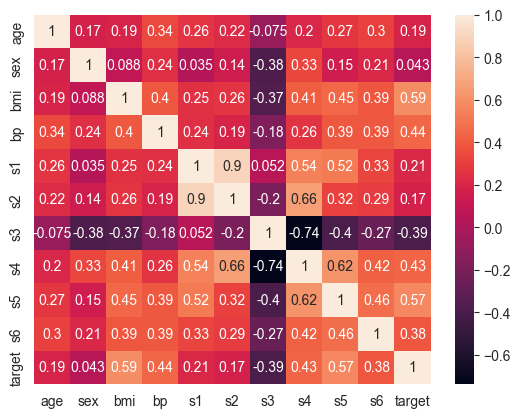

In [126]:
sns.heatmap(df.corr(), annot=True)

In [127]:
# Divide X e y, dropeando target y sex para el conjunto X
x_n = df[['age', 'sex', 'bmi', 'bp', 's1','s3', 's4', 's5', 's6']]
x_n

,age,sex,bmi,bp,s1,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,-0.028674,0.026560,0.044529,-0.025930


In [128]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_n, target, train_size = 422, shuffle=False)
diabetes_model_NS = LinearRegression()
diabetes_model_NS.fit(x_train, y_train)

LinearRegression()

In [129]:
diabetes_model_NS.score(x_test, y_test)

0.5883683334133678

In [130]:
predictions_NS = diabetes_model_NS.predict(x_test)
predictions_NS

array([196.71441903, 151.17818737, 169.91921853, 109.32625705,
       162.2165396 , 132.50786857, 260.53879034,  99.8712914 ,
       114.50186824, 122.47105338, 217.9900753 ,  61.66527099,
       134.28253664, 120.65860542,  54.41261032, 192.26390747,
       102.15141817, 125.50060964, 208.87539111,  48.112072  ])

In [131]:
# Muestra MAE, MAPE, MSE, RMSE
print('MAE:', mean_absolute_error(y_test, predictions_NS)) # cuanto mas distinto sea del RMSE, mas errores groseros tengo, mas desviacion estandar.
print('MSE:', mean_squared_error(y_test, predictions_NS))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_NS)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions_NS))

MAE: 36.61928987086282
MSE: 1988.6584423466738
RMSE: 44.594376801864534
MAPE: 0.396332157711957


In [132]:
# score

In [133]:
# Divide X e y, dropeando target y sex para el conjunto X
x_nueva = df[['bmi', 'bp','s1','s5']]
x_nueva

,bmi,bp,s1,s5
0,0.061696,0.021872,-0.044223,0.019907
1,-0.051474,-0.026328,-0.008449,-0.068332
2,0.044451,-0.005670,-0.045599,0.002861
3,-0.011595,-0.036656,0.012191,0.022688
4,-0.036385,0.021872,0.003935,-0.031988
...,...,...,...,...
437,0.019662,0.059744,-0.005697,0.031193
438,-0.015906,-0.067642,0.049341,-0.018114
439,-0.015906,0.017293,-0.037344,-0.046883
440,0.039062,0.001215,0.016318,0.044529


In [134]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_nueva, target, train_size = 422, shuffle=False)
diabetes_model_u = LinearRegression()
diabetes_model_u.fit(x_train, y_train)

LinearRegression()

In [135]:
diabetes_model_u.score(x_test, y_test)

0.5880935913907241

In [136]:
predictions_u = diabetes_model_u.predict(x_test)
predictions_u

array([224.24992972, 138.90490694, 172.78382212, 113.35100991,
       155.01830375, 140.83257965, 265.47209981, 100.11157944,
        93.44707124, 138.44600541, 208.02428182,  65.69606123,
       125.78877109, 106.31744798,  60.09183833, 202.48506349,
       102.37104477, 125.90835028, 201.6759591 ,  65.74837714])

In [137]:
# Muestra MAE, MAPE, MSE, RMSE
print('MAE:', mean_absolute_error(y_test, predictions_u)) # cuanto mas distinto sea del RMSE, mas errores groseros tengo, mas desviacion estandar.
print('MSE:', mean_squared_error(y_test, predictions_u))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_u)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions_u))

MAE: 35.51907255517422
MSE: 1989.9857650167892
RMSE: 44.60925649477684
MAPE: 0.38853653053518855


# Datos transformados

In [138]:
from sklearn.preprocessing import PolynomialFeatures

In [157]:
# Muestra MAE, MAPE, MSE, RMSE anteriores
print('MAE:', mean_absolute_error(y_test, predictions_u))
print('MSE:', mean_squared_error(y_test, predictions_u))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_u)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions_u))

MAE: 35.51907255517422
MSE: 1989.9857650167892
RMSE: 44.60925649477684
MAPE: 0.38853653053518855


In [ ]:
# instanciamos la clase
polynomial_transformer_2 = PolynomialFeatures(degree=2)

# 
polynomial_transformer_2.fit(x_train)

# transformamos el train
x_train_degree2 = polynomial_transformer_2.transform(x_train)
x_test_degree2 = polynomial_transformer_2.transform(x_test)

# Entranamiento del modelo
modelo_degree2 = LinearRegression()
modelo_degree2.fit (x_train_degree2, y_train)

LinearRegression()

In [156]:
# METRICAS con los datos transformados
print('MAE test', mean_absolute_error(y_test, modelo_degree2.predict(x_test_degree2)))
print('MSE test', mean_squared_error(y_test, modelo_degree2.predict(x_test_degree2)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, modelo_degree2.predict(x_test_degree2))))
print('MAPE test', mean_absolute_percentage_error(y_test, modelo_degree2.predict(x_test_degree2)))

MAE test 34.28502411684401
MSE test 1746.8250280639375
RMSE test 41.795035926099374
MAPE test 0.39374532959717035


In [158]:
# instanciamos la clase
polynomial_transformer_3 = PolynomialFeatures(degree=3)

# fit del modelo
polynomial_transformer_3.fit(x_train)

# transformamos el train
x_train_degree3 = polynomial_transformer_3.transform(x_train)
x_test_degree3 = polynomial_transformer_3.transform(x_test)

# Entranamiento del modelo
modelo_degree3 = LinearRegression()
modelo_degree3.fit (x_train_degree3, y_train)

LinearRegression()

In [159]:
# METRICAS con los datos transformados
print('MAE test', mean_absolute_error(y_test, modelo_degree3.predict(x_test_degree3)))
print('MSE test', mean_squared_error(y_test, modelo_degree3.predict(x_test_degree3)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, modelo_degree3.predict(x_test_degree3))))
print('MAPE test', mean_absolute_percentage_error(y_test, modelo_degree3.predict(x_test_degree3)))

MAE test 52.0
MSE test 4196.0
RMSE test 64.77653896280658
MAPE test 0.501164186861178


In [160]:
# instanciamos la clase
polynomial_transformer_4 = PolynomialFeatures(degree=4)

# fit del modelo
polynomial_transformer_4.fit(x_train)

# transformamos el train
x_train_degree4 = polynomial_transformer_4.transform(x_train)
x_test_degree4 = polynomial_transformer_4.transform(x_test)

# Entranamiento del modelo
modelo_degree4 = LinearRegression()
modelo_degree4.fit (x_train_degree4, y_train)

# METRICAS con los datos transformados
print('MAE test', mean_absolute_error(y_test, modelo_degree4.predict(x_test_degree4)))
print('MSE test', mean_squared_error(y_test, modelo_degree4.predict(x_test_degree4)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, modelo_degree4.predict(x_test_degree4))))
print('MAPE test', mean_absolute_percentage_error(y_test, modelo_degree4.predict(x_test_degree4)))

MAE test 180.7
MSE test 71298.4
RMSE test 267.0176024160205
MAPE test 2.0745954098657515
